In [176]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [177]:
vehicles_data=pd.read_csv('./data/Vehicle_Information.zip', encoding='latin1')
vehicles_data

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177200,2016984131116,21 - 25,14.0,Urban area,NaN,1598.0,NaN,NaN,Not known,Mid Junction - on roundabout or on main road,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2016
2177201,2016984131116,56 - 65,NaN,Small town,NaN,1598.0,NaN,NaN,Commuting to/from work,Mid Junction - on roundabout or on main road,...,NaN,No tow/articulation,Offside,0.0,Going ahead other,2,Car,No,Front,2016
2177202,2016984131216,56 - 65,NaN,Urban area,3.0,NaN,NaN,Central crash barrier,Journey as part of work,Not at or within 20 metres of junction,...,NaN,No tow/articulation,Offside on to central reservation,0.0,Going ahead other,1,Goods 7.5 tonnes mgw and over,No,Offside,2016
2177203,2016984131316,16 - 20,13.0,Urban area,6.0,1796.0,NaN,Tree,Not known,Not at or within 20 metres of junction,...,Skidded,No tow/articulation,Offside,0.0,Going ahead other,1,Car,No,Front,2016


In [178]:
vehicles_data.isnull().sum()

Accident_Index                            0
Age_Band_of_Driver                        0
Age_of_Vehicle                       358149
Driver_Home_Area_Type                     0
Driver_IMD_Decile                    734812
Engine_Capacity_.CC.                 265861
Hit_Object_in_Carriageway           2087824
Hit_Object_off_Carriageway          1989741
Journey_Purpose_of_Driver                 0
Junction_Location                         0
make                                 110845
model                                325331
Propulsion_Code                      245843
Sex_of_Driver                             0
Skidding_and_Overturning            1898208
Towing_and_Articulation                   0
Vehicle_Leaving_Carriageway               0
Vehicle_Location.Restricted_Lane       1317
Vehicle_Manoeuvre                         0
Vehicle_Reference                         0
Vehicle_Type                              0
Was_Vehicle_Left_Hand_Drive               0
X1st_Point_of_Impact            

In [179]:
vehicles_data.shape

(2177205, 24)

In [180]:
to_drop=["Hit_Object_in_Carriageway","Hit_Object_off_Carriageway","Skidding_and_Overturning","Journey_Purpose_of_Driver","Towing_and_Articulation","Was_Vehicle_Left_Hand_Drive","Accident_Index"]

vehicles_data.drop(to_drop,axis=1,inplace=True)

In [181]:
vehicles_data.dropna(inplace=True)

vehicles_data.drop(vehicles_data[vehicles_data["Junction_Location"] == "Data missing or out of range"].index, inplace=True)

vehicles_data.drop(vehicles_data[vehicles_data["Age_Band_of_Driver"] == "Data missing or out of range"].index, inplace=True)

vehicles_data.drop(vehicles_data[vehicles_data["Age_Band_of_Driver"] == "Not known"].index, inplace=True)

#filtered_data = vehicles_data[(vehicles_data['Age_Band_of_Driver'] == 'Data missing or out of range') & (vehicles_data['Age_Band_of_Driver'] != 'Not known')]

vehicles_data.drop_duplicates(inplace=True)

In [182]:
vehicles_data.isna().sum().sum()

0

In [183]:
vehicles_data.duplicated().sum()

0

In [184]:
vehicles_data.head(10)

,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,X1st_Point_of_Impact,Year
118799,46 - 55,4.0,Urban area,1.0,1769.0,Not at or within 20 metres of junction,NISSAN,ALMERA SE AUTO,Petrol,Female,Did not leave carriageway,0.0,Going ahead other,1,Car,Front,2005
118801,46 - 55,1.0,Urban area,4.0,2976.0,Not at or within 20 metres of junction,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,Did not leave carriageway,0.0,Moving off,1,Car,Did not impact,2005
118802,26 - 35,2.0,Urban area,2.0,124.0,Not at or within 20 metres of junction,PIAGGIO,VESPA ET4,Petrol,Female,Did not leave carriageway,0.0,Going ahead other,2,Motorcycle 125cc and under,Did not impact,2005
118804,36 - 45,4.0,Urban area,6.0,4266.0,Approaching junction or waiting/parked at junc...,MERCEDES,ML 430 AUTO,Petrol,Male,Did not leave carriageway,0.0,Parked,2,Car,Back,2005
118805,66 - 75,16.0,Urban area,7.0,5343.0,Not at or within 20 metres of junction,JAGUAR,XJ-S CONVERTIBLE AUTO,Petrol,Male,Nearside,0.0,Going ahead other,1,Car,Front,2005
118806,26 - 35,6.0,Urban area,3.0,1988.0,Mid Junction - on roundabout or on main road,FORD,MONDEO GHIA X AUTO,Petrol,Male,Did not leave carriageway,0.0,Going ahead other,1,Car,Front,2005
118808,26 - 35,2.0,Urban area,8.0,698.0,Mid Junction - on roundabout or on main road,MCC,SMART PURE SOFTIP 61 S-A,Petrol,Male,Offside,0.0,Going ahead other,1,Car,Front,2005
118809,26 - 35,4.0,Urban area,6.0,2148.0,Mid Junction - on roundabout or on main road,MERCEDES,C220 CDI CLASSIC,Heavy oil,Male,Did not leave carriageway,0.0,Turning left,2,Car,Did not impact,2005
118810,36 - 45,2.0,Urban area,7.0,1171.0,Not at or within 20 metres of junction,BMW,K 1200 GT,Petrol,Male,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle over 500cc,Front,2005
118812,26 - 35,7.0,Urban area,6.0,1998.0,Mid Junction - on roundabout or on main road,PEUGEOT,406 2.0 COUPE AUTO,Petrol,Male,Did not leave carriageway,0.0,Turning right,1,Car,Offside,2005


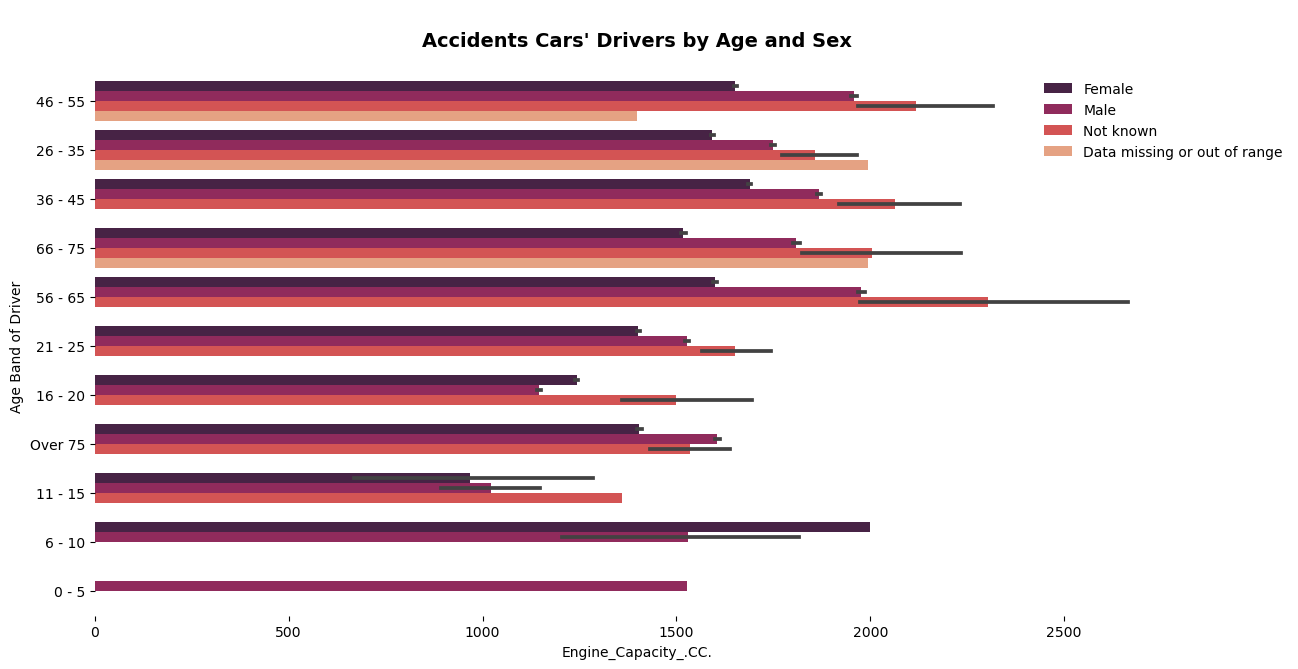

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt




# seaborn barplot
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver', x='Engine_Capacity_.CC.', hue='Sex_of_Driver', data=vehicles_data, palette='rocket')
ax.set_title('\nAccidents Cars\' Drivers by Age and Sex\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Engine_Capacity_.CC.', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True)

In [186]:
# prepare dataframe
df_plot = vehicles_data.groupby('Vehicle_Manoeuvre').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
                                                                                                  
df_plot = df_plot[df_plot.counts > 80000]